In [1]:

import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px

In [2]:
data = pd.read_csv("C:/Users/hp/kifiya_10_acadamy/dataset/MSFT_historical_data.csv")

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']

fig = make_subplots(rows=1, cols=4, subplot_titles=['Close', 'Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=data.index, y=data['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Open']), row=1, col=2)
fig.add_trace(go.Scatter(x=data.index, y=data['High']), row=1, col=3)
fig.add_trace(go.Scatter(x=data.index, y=data['Low']), row=1, col=4)

fig.update_layout(height=400, width=1200, title_text='Microsoft Stock Analysis')
fig.show()

In [4]:
# Create an instance of the FinancialAnalyzer class
import sys
sys.path.append('..')
from scripts.financial import *

In [5]:
calculate_technical_indicators(data)

Date        Open        High         Low       Close  \
Date                                                                    
1986-03-13 1986-03-13    0.088542    0.101563    0.088542    0.097222   
1986-03-14 1986-03-14    0.097222    0.102431    0.097222    0.100694   
1986-03-17 1986-03-17    0.100694    0.103299    0.100694    0.102431   
1986-03-18 1986-03-18    0.102431    0.103299    0.098958    0.099826   
1986-03-19 1986-03-19    0.099826    0.100694    0.097222    0.098090   
...               ...         ...         ...         ...         ...   
2024-07-24 2024-07-24  440.450012  441.480011  427.589996  428.899994   
2024-07-25 2024-07-25  428.799988  429.799988  417.510010  418.399994   
2024-07-26 2024-07-26  418.200012  428.920013  417.269989  425.269989   
2024-07-29 2024-07-29  431.579987  432.149994  424.700012  426.730011   
2024-07-30 2024-07-30  427.720001  429.049988  417.359985  422.920013   

             Adj Close      Volume  Dividends  Stock Splits         SMA  \
Date                                                                      
1986-03-13    0.059946  1031788800        0.0           0.0         NaN   
1986-03-14    0.062087   308160000        0.0           0.0         NaN   
1986-03-17    0.063158   133171200        0.0           0.0         NaN   
1986-03-18    0.061552    67766400        0.0           0.0         NaN   
1986-03-19    0.060482    47894400        0.0           0.0         NaN   
...                ...         ...        ...           ...         ...   
2024-07-24  428.128326    26805800        0.0           0.0  451.887498   
2024-07-25  417.647217    29943800        0.0           0.0  450.199498   
2024-07-26  424.504852    23583800        0.0           0.0  448.820497   
2024-07-29  425.962250    15125800        0.0           0.0  447.809497   
2024-07-30  422.159119    32687600        0.0           0.0  446.118997   

                  RSI         EMA      MACD  MACD_Signal  
Date                                                      
1986-03-13        NaN         NaN       NaN          NaN  
1986-03-14        NaN         NaN       NaN          NaN  
1986-03-17        NaN         NaN       NaN          NaN  
1986-03-18        NaN         NaN       NaN          NaN  
1986-03-19        NaN         NaN       NaN          NaN  
...               ...         ...       ...          ...  
2024-07-24  36.980921  446.197526 -0.684986     3.013510  
2024-07-25  31.696381  443.550142 -2.740453     1.862718  
2024-07-26  37.944660  441.809175 -3.771598     0.735855  
2024-07-29  39.217239  440.373064 -4.420024    -0.295321  
2024-07-30  37.080269  438.710869 -5.181612    -1.272579  

[9672 rows x 14 columns]

In [6]:
plot_indicators(data = data, indicators = ['Close', 'SMA'], title = 'Stock Price with Moving Average')


In [7]:
plot_indicators(data = data, indicators = ['RSI'], title = 'Relative Strength Index (RSI)')

In [8]:
plot_indicators(data = data, indicators = ['Close', 'EMA'], title = 'Stock Price with Exponential Moving Average')

In [9]:
plot_indicators(data = data, indicators = ['MACD', 'MACD_Signal'], title = 'Moving Average Convergence Divergence (MACD)')

In [10]:

# Fetching Data Example
tickers = ['AAPL', 'GOOG', 'MSFT']
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

print(data.head())  # Check the structure of the DataFrame


[*********************100%***********************]  3 of 3 completed

Ticker           AAPL       GOOG        MSFT
Date                                        
2020-01-02  72.796028  68.123726  153.630676
2020-01-03  72.088287  67.789421  151.717743
2020-01-06  72.662704  69.460922  152.109863
2020-01-07  72.320976  69.417580  150.722992
2020-01-08  73.484344  69.964615  153.123749


In [11]:
# Calculate portfolio weights
weights = calculate_portfolio_weights(data,['AAPL', 'GOOG', 'MSFT'])
print(weights)

[0.33333333 0.33333333 0.33333333]


In [12]:
# Calculate Daily Returns
returns = data.pct_change().dropna()

# Define Portfolio Weights (example: 40% AAPL, 30% GOOG, 30% MSFT)
weights = np.array([0.4, 0.3, 0.3])

# Portfolio Return: Weighted Average Return
mean_returns = returns.mean()
portfolio_return = np.dot(weights, mean_returns)

# Portfolio Volatility: sqrt(w^T Σ w)
cov_matrix = returns.cov()
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Sharpe Ratio: (Portfolio Return - Risk-Free Rate) / Portfolio Volatility
risk_free_rate = 0.03 / 252  # Approx. daily risk-free rate (3% annualized)
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

# Print Results
print(f"Portfolio Return: {portfolio_return:.4f}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Portfolio Return: 0.0011
Portfolio Volatility: 0.0191
Sharpe Ratio: 0.0507


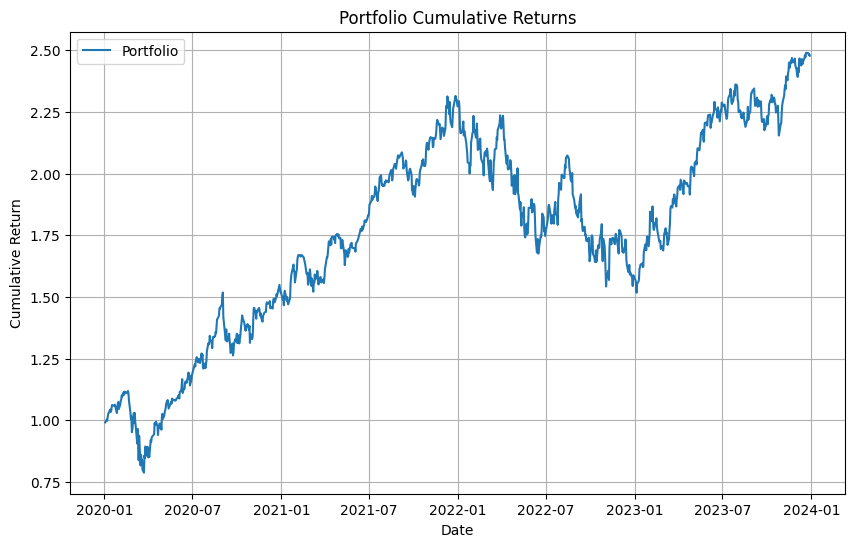

In [13]:
# Calculate Portfolio Daily Returns
portfolio_daily_returns = returns.dot(weights)

# Calculate Cumulative Returns
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Plot Cumulative Performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Portfolio")
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()